In [1]:
%run '/home/gvolta/XENONnT/LedAnalysis/Initialization_for_SPE.py'

In [2]:
run_id = '180219_1049'
data_rr = st.get_array(run_id, 'raw_records', seconds_range=(0,20))

In [3]:
len(data_rr[data_rr['channel']==0])

8139

<IPython.core.display.Javascript object>


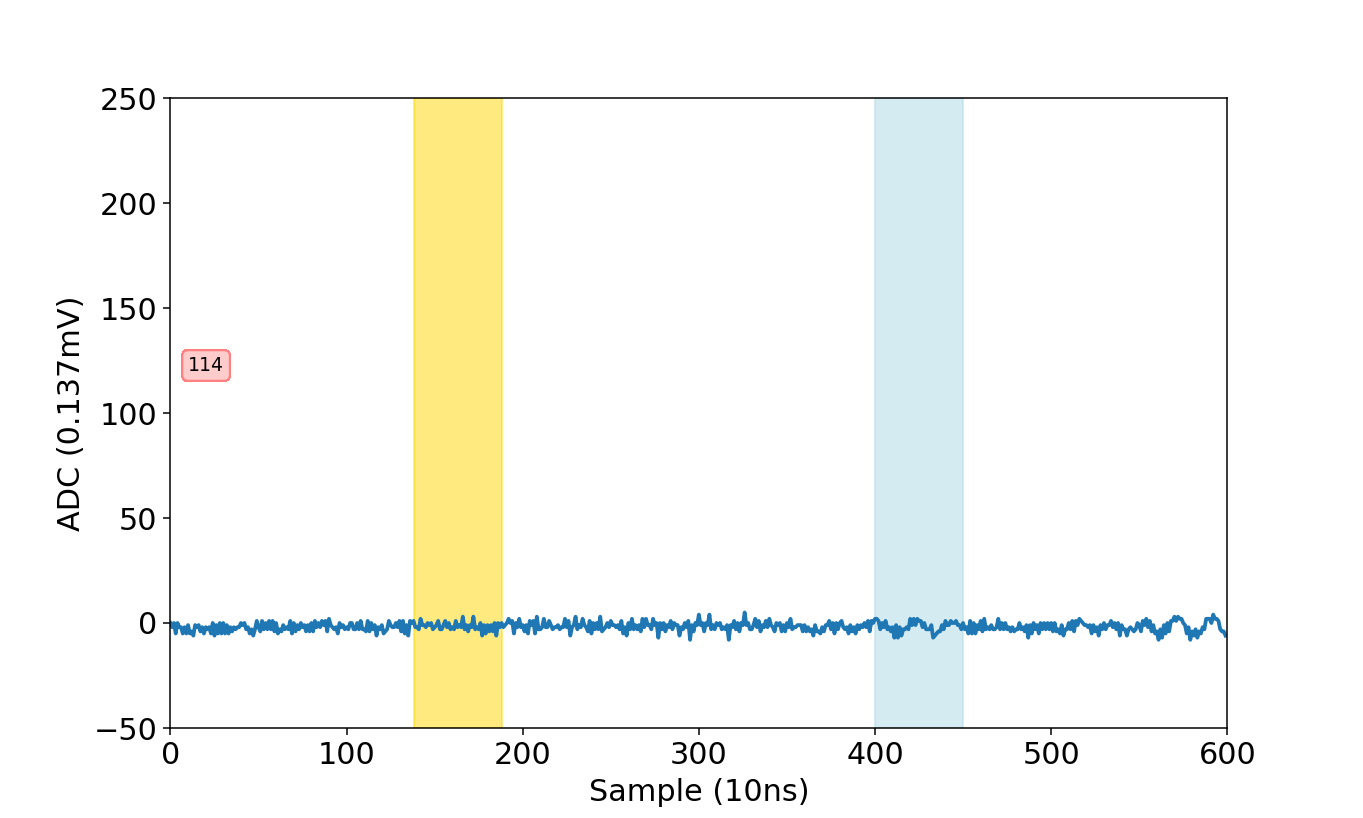

In [6]:
%matplotlib notebook

channel = 0
PMT = data_rr[data_rr['channel']==channel]
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(0, 600), ylim=(-50, +250))
ax.set_xlabel('Sample (10ns)')
ax.set_ylabel('ADC (0.137mV)')
ax.axvspan(138, 188, alpha=0.5, color='gold')
ax.axvspan(400, 450, alpha=0.5, color='lightblue')
wf, = ax.plot([ ],[ ], lw=2)
# initialization function: plot the background of each frame
def init():
    wf.set_data([ ], [ ])
    return wf,
# animation function.  This is called sequentially
def animate(i):
    ax.text(10, 120, s=str(i), bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
    x = np.arange(0, 600, 1)
    y = -(PMT['data'][i] - 16002)
    wf.set_data(x, y)
    return wf,
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=None, interval=1000, blit=True, repeat=False )